# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df_flights = pd.read_csv('flights.csv')
df_flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [178]:
# Your code to explore the data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

**__There are 2761 nulls in depdel15,we can fill it by knowing the DepDelay minutes__**

In [179]:
df_flights.query('DepDel15.isnull()')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


**__So we can see that all null values of DepDel15 has DepDelay with zero values so we can fill it with zero as there is no delays__**

In [180]:
df_flights.query('DepDel15.isnull() and DepDelay > 0')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


In [181]:
df_flights=df_flights.fillna(0,)

In [182]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [183]:
# to check if there are no nulls anymore
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Now there are no nulls


In [184]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [185]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           271940 non-null  float64
 16  CR

#### origin airport id and destination airport id should be of object type not int

In [186]:
df_flights['OriginAirportID']= df_flights['OriginAirportID'].map(str)
df_flights['DestAirportID']= df_flights['DestAirportID'].map(str)
df_flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  object 
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  object 
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           271940 non-null  float64
 16  CR

In [198]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [187]:
Cancelled= df_flights.query('Cancelled == 1').Cancelled.sum()

In [188]:
cancelcit=df_flights.groupby('OriginCity').Cancelled.sum()
cancelcit.sort_values(ascending=False)

OriginCity
Chicago                       345
New York                      268
Dallas/Fort Worth             157
San Francisco                 151
Washington                    139
                             ... 
San Juan                        4
Fort Myers                      4
West Palm Beach/Palm Beach      4
Anchorage                       3
Long Beach                      1
Name: Cancelled, Length: 66, dtype: int64

We can see that Chicago has the most cancelled flights while Long Beach had only one cancelled flight

In [189]:
df_flights.query('OriginCity == "Chicago"').DepDelay

3          35
8           8
47         -1
68        108
103        26
         ... 
271852     -7
271861     -5
271888     65
271919      0
271933     -6
Name: DepDelay, Length: 17918, dtype: int64

In [190]:
max_del_chi=df_flights.query('OriginCity == "Chicago"').DepDelay.max()

In [191]:
df_flights.query('DepDelay == 585')

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
208882,2013,6,6,4,DL,13930,Chicago O'Hare International,Chicago,IL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,1530,585,1.0,1829,578,1,0


In [192]:
df_flights.groupby('DestCity').Cancelled.sum().sort_values(ascending=False)

DestCity
Chicago                       345
New York                      261
Dallas/Fort Worth             161
Newark                        143
Los Angeles                   134
                             ... 
Tucson                          4
West Palm Beach/Palm Beach      3
San Juan                        2
Anchorage                       2
Long Beach                      2
Name: Cancelled, Length: 66, dtype: int64

In [193]:
df_flights.query('ArrDelay >= 200').value_counts()

Year  Month  DayofMonth  DayOfWeek  Carrier  OriginAirportID  OriginAirportName                          OriginCity   OriginState  DestAirportID  DestAirportName                                       DestCity           DestState  CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled
2013  4      1           1          AA       12892            Los Angeles International                  Los Angeles  CA           11298          Dallas/Fort Worth International                       Dallas/Fort Worth  TX         1315        248       1.0       1815        228       1         0            1
      7      16          2          VX       12889            McCarran International                     Las Vegas    NV           14771          San Francisco International                           San Francisco      CA         1905        195       1.0       2035        221       1         0            1
             19          5          MQ       11433            Detroit Metro Wa

Chicago has the most cancelled flight as destCity 

**__Although this flight was delayed by 585 mins, it wasn't cancelled__**

In [194]:
air_del = df_flights.groupby('OriginAirportName').DepDelay.sum().sort_values(ascending=False)
top5= air_del.head()
top5

OriginAirportName
Chicago O'Hare International                210871
Hartsfield-Jackson Atlanta International    162386
Dallas/Fort Worth International             149088
Denver International                        131714
San Francisco International                 115396
Name: DepDelay, dtype: int64

<Axes: xlabel='OriginAirportName'>

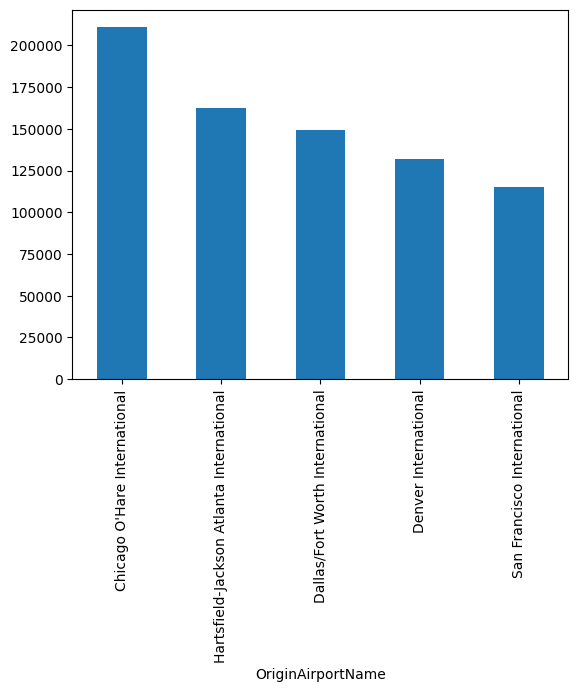

In [195]:
#show top 5 airlines caused delays

top5.plot(kind='bar')

In [196]:
ar_del=df_flights.groupby('DestAirportName').ArrDelay.sum().sort_values(ascending=False)
t5=ar_del.head()


Text(0.5, 1.0, 'the top 5 delayed airline')

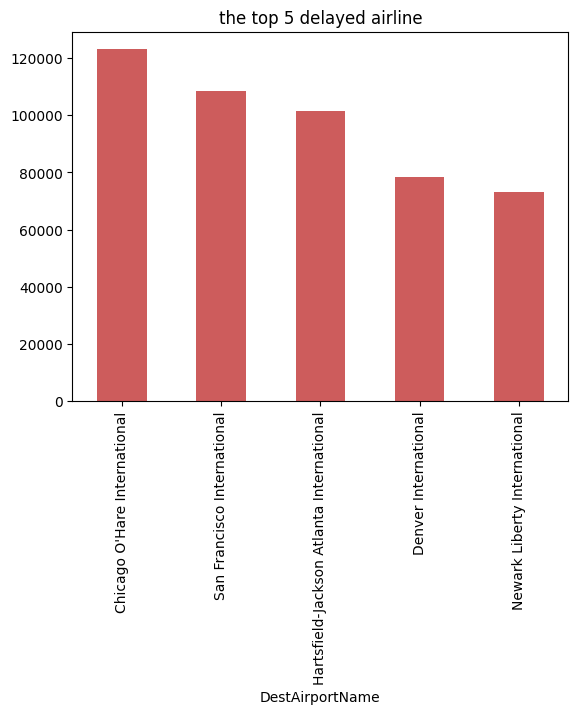

In [200]:
t5.plot(kind='bar', color='IndianRed')
plt.title('the top 5 delayed airline')

**__We can see from the 2 figs above that the top 5 airlines cauesed the most delays in depature and arrival__**
Chicago O'Hare is the top for depature and arrival aireline

Let's see the best airline 


In [204]:
df_flights.query('DepDelay == 0').value_counts()

Year  Month  DayofMonth  DayOfWeek  Carrier  OriginAirportID  OriginAirportName                           OriginCity         OriginState  DestAirportID  DestAirportName                             DestCity        DestState  CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled
2013  4      1           1          9E       11433            Detroit Metro Wayne County                  Detroit            MI           14524          Richmond International                      Richmond        VA         1003        0         0.0       1146        -10       0         0            1
      8      13          2          DL       11433            Detroit Metro Wayne County                  Detroit            MI           11057          Charlotte Douglas International             Charlotte       NC         726         0         0.0       913         -13       0         0            1
                                             11278            Ronald Reagan Washington National 